# ASSIGNMENT 3: CMTH 642 DATA ANALYTICS: ADVANCED METHODS


# Name:Tusaif Azmat             
# Student#:500660278

In [36]:
#pip install pingouin --upgrade 

## Preparation:

The dataset is related to white Portuguese "Vinho Verde" wine. For more info: https://archive.ics.uci.edu/ml/datasets/Wine+Quality 

Import the following files: 

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1]:
#imports needed for the this Assignment

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pingouin as pg

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
dataset_1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
dataset_2 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df_1 = pd.DataFrame(dataset_1)
df_2 = pd.DataFrame(dataset_2)

# Questions:

### 1. Combine Red and White wine datasets. (4 points)

In [3]:
##### Combine DataFrames with Append() #####
############################################
wine_data_all = df_1.append(df_2, ignore_index=True) 
wine_data_all.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### 2. Check the datatypes of the attributes. (3 points)

In [4]:
wine_data_all.info()
# As you could see the data types of all the attributes below.
# 11 Float and 1 integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### 3. Are there any missing values in the dataset? (4 points)

In [5]:
wine_data_all.isnull().sum()
#As can be seen below there is no missing values in the combined dataset.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4.What is the correlation between the attributes other than Quality? (10 points)

#### Method 1

In [6]:
import pingouin as pg
# First we can drope the quality
df_no_quality= wine_data_all.drop(['quality'], axis='columns')

df_no_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [7]:
# Now we can calculate the pairwise pearson correlation
corr = pg.pairwise_corr(df_no_quality, method='pearson')
# Sort the correlation by p-values and display the first rows
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
40,free sulfur dioxide,total sulfur dioxide,6497,0.720934,0.0
29,residual sugar,total sulfur dioxide,6497,0.495482,0.0
6,fixed acidity,density,6497,0.458910,0.0
51,density,alcohol,6497,-0.686745,0.0
30,residual sugar,density,6497,0.552517,0.0


In [8]:
df_no_quality.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,0.22,0.32,-0.11,0.30,-0.28,-0.33,0.46,-0.25,0.30,-0.10
volatile acidity,0.22,1.00,-0.38,-0.20,0.38,-0.35,-0.41,0.27,0.26,0.23,-0.04
citric acid,0.32,-0.38,1.00,0.14,0.04,0.13,0.20,0.10,-0.33,0.06,-0.01
residual sugar,-0.11,-0.20,0.14,1.00,-0.13,0.40,0.50,0.55,-0.27,-0.19,-0.36
chlorides,0.30,0.38,0.04,-0.13,1.00,-0.20,-0.28,0.36,0.04,0.40,-0.26
free sulfur dioxide,-0.28,-0.35,0.13,0.40,-0.20,1.00,0.72,0.03,-0.15,-0.19,-0.18
total sulfur dioxide,-0.33,-0.41,0.20,0.50,-0.28,0.72,1.00,0.03,-0.24,-0.28,-0.27
density,0.46,0.27,0.10,0.55,0.36,0.03,0.03,1.00,0.01,0.26,-0.69
pH,-0.25,0.26,-0.33,-0.27,0.04,-0.15,-0.24,0.01,1.00,0.19,0.12
sulphates,0.30,0.23,0.06,-0.19,0.40,-0.19,-0.28,0.26,0.19,1.00,-0.00


Text(0.5, 1.0, 'Correlation matrix')

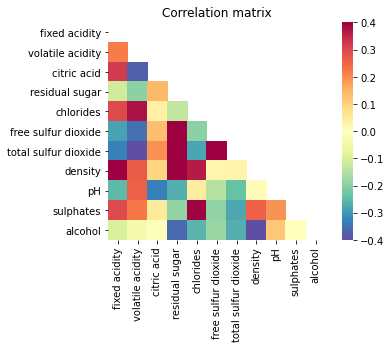

In [9]:
corrs = df_no_quality.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

#### Method 2

In [10]:
wine_data_all.iloc[0:,0:11].corr().abs()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,0.111981,0.298195,0.282735,0.329054,0.458910,0.252700,0.299568,0.095452
volatile acidity,0.219008,1.000000,0.377981,0.196011,0.377124,0.352557,0.414476,0.271296,0.261454,0.225984,0.037640
citric acid,0.324436,0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,0.329808,0.056197,0.010493
residual sugar,0.111981,0.196011,0.142451,1.000000,0.128940,0.402871,0.495482,0.552517,0.267320,0.185927,0.359415
chlorides,0.298195,0.377124,0.038998,0.128940,1.000000,0.195045,0.279630,0.362615,0.044708,0.395593,0.256916
free sulfur dioxide,0.282735,0.352557,0.133126,0.402871,0.195045,1.000000,0.720934,0.025717,0.145854,0.188457,0.179838
total sulfur dioxide,0.329054,0.414476,0.195242,0.495482,0.279630,0.720934,1.000000,0.032395,0.238413,0.275727,0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,0.686745
pH,0.252700,0.261454,0.329808,0.267320,0.044708,0.145854,0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,0.185927,0.395593,0.188457,0.275727,0.259478,0.192123,1.000000,0.003029


#### Q4 Note: 
A correlation is a number between -1 and +1 that measures the degree of association between two Attributes (call them X and Y).
A positive value for the correlation implies a positive association. 
In this case large values of X tend to be associated with large values of Y and small values of X tend to be associated 
with small values of Y. A negative value for the correlation implies a negative or inverse association. 
In this case large values of X tend to be associated with small values of Y and vice versa.

As you can see above the values of both methods are the correlation values...of all attributes except quality.


### 5. Graph the frequency distribution of wine quality by using Quality. (10 points)

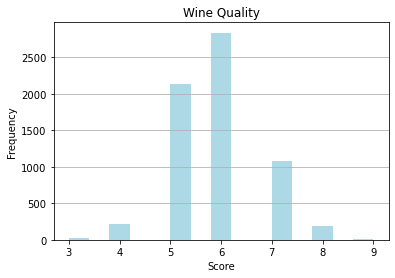

In [11]:
wine_data_all['quality'].plot.hist(grid=True, bins=15, 
                   color='LightBlue')
plt.title('Wine Quality')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='x', alpha=0.75)
# AS you can easily get the frequency distribution of wine quality below.

### 6. Reduce the levels of rating for quality to three levels as high, medium andlow. Assign the levels of 3 and 4 to             level 0; 5 and 6 to level 1; and 7,8 and 9to level 2. (10 points)

In [13]:
# first we get with quality column in the dataset for all
wine_data_all['quality_label'] = wine_data_all.quality.apply(lambda q: 'Low' if q <= 4 else 'Medium' if q <= 6 else 'High')
wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [14]:
# Now We do not need the quality anymore as we new column ...so we can remove it .
wine_data_all= wine_data_all.drop(['quality'], axis='columns')

wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium


In [15]:
wine_data_all.quality_label.value_counts()
# Below you could see the dataset values as per three categories. 
# You can tell dataset is balanced and could do further experiments.

Medium    4974
High      1277
Low        246
Name: quality_label, dtype: int64

### 7. Normalize the numeric attributes. (10 points)

In [16]:
#To Normalizing numeric data with help of the function below
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 

In [17]:
X = list(set(list(wine_data_all)) - set(['quality_label']))
X

['fixed acidity',
 'residual sugar',
 'pH',
 'citric acid',
 'alcohol',
 'chlorides',
 'density',
 'total sulfur dioxide',
 'volatile acidity',
 'free sulfur dioxide',
 'sulphates']

In [18]:
df_new_wine_data_all = wine_data_all.iloc[:,].copy()
df_new_wine_data_all[X] = df_new_wine_data_all[X].apply(normalize)
df_new_wine_data_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,Medium
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,Medium
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,Medium
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,Medium
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,Medium


In [19]:
df_new_wine_data_all.describe()
# Observe the values below

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8. Divide the dataset to training and test sets. (10 points)

In [20]:
# We use the dataset from above as moving forward to split the dataset into train and test sets.
df_train, df_test, y_train, y_test = train_test_split(df_new_wine_data_all[X], df_new_wine_data_all['quality_label'], test_size=0.35, random_state=0)

In [21]:
df_train.head()
# you could see the dataset records are randomly taken for train/test sets.

,fixed acidity,residual sugar,pH,citric acid,alcohol,chlorides,density,total sulfur dioxide,volatile acidity,free sulfur dioxide,sulphates
6249,0.280992,0.026074,0.465116,0.006024,0.550725,0.093023,0.119722,0.092166,0.360000,0.024306,0.162921
3975,0.190083,0.016871,0.364341,0.156627,0.565217,0.039867,0.061500,0.294931,0.106667,0.208333,0.331461
3007,0.099174,0.059816,0.565891,0.192771,0.666667,0.038206,0.047233,0.396313,0.126667,0.197917,0.050562
5089,0.214876,0.019939,0.658915,0.150602,0.260870,0.107973,0.198381,0.099078,0.193333,0.069444,0.224719
5321,0.553719,0.023006,0.333333,0.283133,0.434783,0.094684,0.206092,0.041475,0.106667,0.017361,0.382022


In [22]:
df_new_wine_data_all['quality_label'].head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: quality_label, dtype: object

In [23]:
# same here for test set 
df_test.head()

,fixed acidity,residual sugar,pH,citric acid,alcohol,chlorides,density,total sulfur dioxide,volatile acidity,free sulfur dioxide,sulphates
5316,0.669421,0.021472,0.403101,0.307229,0.347826,0.186047,0.240794,0.032258,0.200000,0.020833,0.303371
5210,0.429752,0.033742,0.465116,0.186747,0.217391,0.139535,0.212840,0.211982,0.253333,0.062500,0.230337
3518,0.305785,0.009202,0.364341,0.246988,0.449275,0.068106,0.081357,0.288018,0.080000,0.086806,0.168539
1622,0.223140,0.108896,0.302326,0.295181,0.101449,0.059801,0.165606,0.375576,0.240000,0.052083,0.084270
2443,0.231405,0.029141,0.333333,0.198795,0.289855,0.071429,0.116638,0.491935,0.160000,0.135417,0.213483


In [24]:
y_test.head()

5316    Medium
5210    Medium
3518    Medium
1622    Medium
2443    Medium
Name: quality_label, dtype: object

### 9.Use the KNN algorithm to predict the quality of wine using its attributes.(12 points)

In [25]:
# Predictions using KNN classifier
knn_pred = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance') 
knn_pred.fit(df_train[X], y_train) 

KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1,
                     weights='distance')

In [26]:
# train the model first train set
print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y_train, knn_pred.predict(df_train))))
# see the Accuracy is 100% for training

KNeighbors Classifier Training Accuracy: 100.00%


In [28]:
# Now start prediction with test set
y_pred = knn_pred.predict(df_test)  
y_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'High', 'Medium'],
      dtype=object)

In [29]:
# train the model first train set
print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))
# As you see the accuracy below its not exceptional but okay.

KNeighbors Classifier Test Accuracy: 83.11%


### 10.Display the confusion matrix to evaluate the model performance. (12 points)

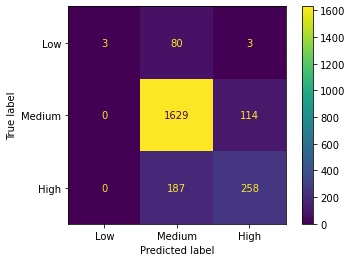

In [30]:
plot_confusion_matrix(knn_pred, df_test, y_test, labels=['Low','Medium','High'])  

In [31]:
matrix = confusion_matrix(y_test,y_pred, labels=['Low','Medium','High'])
print('Classification report : \n',matrix)

Classification report : 
 [[   3   80    3]
 [   0 1629  114]
 [   0  187  258]]


### 11. Evaluate the model performance by computing Accuracy, Precision and Recall(Sensitivity). (15 points)

In [32]:
# You can observe classification report for precision, recall f1-score and accuracy
matrix_report = classification_report(y_test,y_pred, labels=['Low','Medium','High'])
print('Classification report : \n',matrix_report)

Classification report : 
               precision    recall  f1-score   support

         Low       1.00      0.03      0.07        86
      Medium       0.86      0.93      0.90      1743
        High       0.69      0.58      0.63       445

    accuracy                           0.83      2274
   macro avg       0.85      0.52      0.53      2274
weighted avg       0.83      0.83      0.81      2274



#### We you can see one Accuracy(0.83) as a whole, and you could also see the values of each group for Sensitivity(recall), Precision for each group, at the above report.

#### Now here we can also find the specificity for each group in the following:

In [33]:
# For 'Low' group
low_Specificity =(matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2]) /(matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2]+matrix[1,0]+matrix[2,0])
print('Low_Specificity : ', low_Specificity )

Low_Specificity :  1.0


In [34]:
# For 'Medium' group
Medium_Specificity =(matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2]) /(matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2]+matrix[0,1]+matrix[2,1])
print('Medium_Specificity : ',round(Medium_Specificity,3) )

Medium_Specificity :  0.497


In [35]:
# For 'High' group
High_Specificity =(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]) /(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]+matrix[0,2]+matrix[1,2])
print('High_Specificity : ',round(High_Specificity,3) )

High_Specificity :  0.936
